In [35]:
!pip install yellowbrick

  Using cached yellowbrick-1.2-py3-none-any.whl (269 kB)


# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import PolynomialFeatures
from scipy.cluster.hierarchy import dendrogram

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [5]:
# Lo primero de todo seria transformar mediante STandarSacler para poder aplicar el modelo de Kmeans

scaler = StandardScaler()
scaler.fit(X)

transformed_X = scaler.transform(X)

In [6]:
# Kmeans clustering model

k_means = KMeans(n_clusters=8, 
                 random_state=0)

k_means.fit(X)

data = pd.DataFrame(transformed_X, columns=data["feature_names"])
data['target'] = y
data['cluster'] = k_means.labels_

In [9]:
# Silhouette score
silhouette_score(transformed_X, labels=k_means.labels_)

-0.04344819088682022

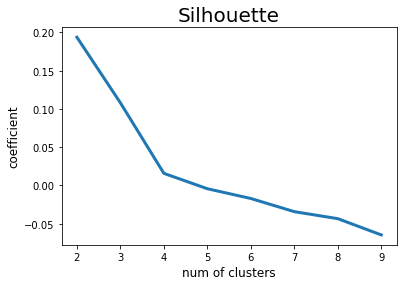

In [10]:
Ks = range(2, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [silhouette_score(transformed_X, labels=km[i].fit(X).labels_) for i in range(len(km))]
plt.title('Silhouette', size=20)
plt.xlabel('num of clusters', size=12)
plt.ylabel('coefficient', size=12)
plt.plot(Ks, score, lw=3)
plt.show()

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [18]:
# Kmeans clustering model

k_means = KMeans(n_clusters=5, 
                 random_state=0)

k_means.fit(X)

#data = pd.DataFrame(transformed_X, columns=data["feature_names"])
data['target'] = y
data['cluster'] = k_means.labels_

In [19]:
# Silhouette score
silhouette_score(transformed_X, labels=k_means.labels_)

-0.00432233166667748

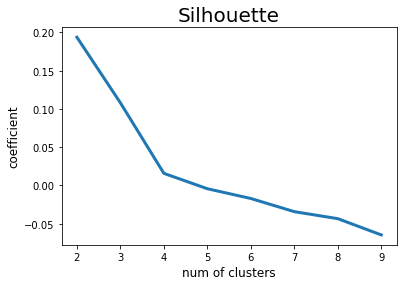

In [20]:
Ks = range(2, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [silhouette_score(transformed_X, labels=km[i].fit(X).labels_) for i in range(len(km))]
plt.title('Silhouette', size=20)
plt.xlabel('num of clusters', size=12)
plt.ylabel('coefficient', size=12)
plt.plot(Ks, score, lw=3)
plt.show()

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

0.1080137021776675


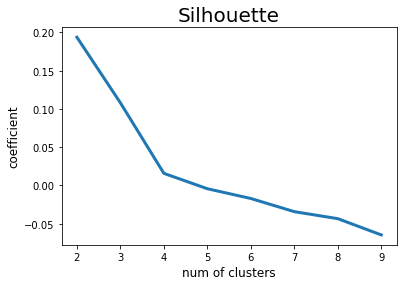

In [24]:
# Kmeans clustering model
k_means = KMeans(n_clusters=3, 
                 random_state=0)

k_means.fit(X)

#data = pd.DataFrame(transformed_X, columns=data["feature_names"])
data['target'] = y
data['cluster'] = k_means.labels_


# Silhouette score
print(silhouette_score(transformed_X, labels=k_means.labels_))


Ks = range(2, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [silhouette_score(transformed_X, labels=km[i].fit(X).labels_) for i in range(len(km))]
plt.title('Silhouette', size=20)
plt.xlabel('num of clusters', size=12)
plt.ylabel('coefficient', size=12)
plt.plot(Ks, score, lw=3)
plt.show()

* Las tres gráficas me salen muy parecidas
* PERO el "Silhouette score" VA AUMENTANDO a medida que vamos disminuyendo el nº de clusters

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

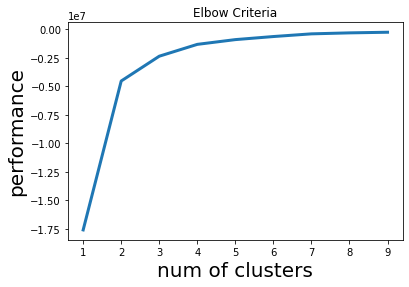

In [30]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [km[i].fit(X).score(X) for i in range(len(km))]
plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('performance', size=20)
plt.plot(Ks, score, lw=3)
plt.show()

* Los siguientes pasos son con ayuda de la documentacion de la libreria yellowbrick :"https://www.scikit-yb.org/en/latest/api/cluster/elbow.html"

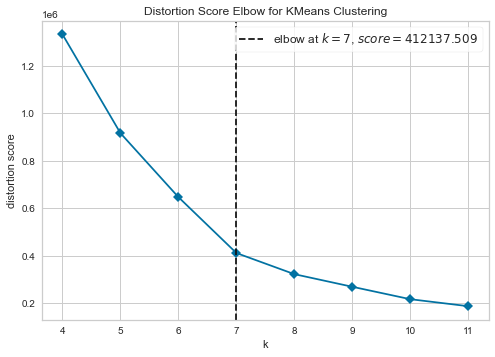

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Métrica --> distortion

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='distortion', timings=False
)

visualizer.fit(X)        
visualizer.show()        

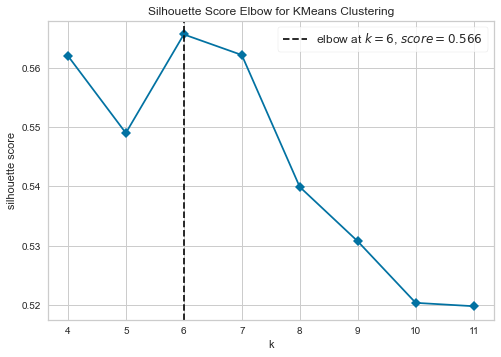

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [46]:
# Métrica --> silhouette

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='silhouette', timings=False
)

visualizer.fit(X)        
visualizer.show() 

c:\users\leticia\documents\miniconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\leticia\documents\miniconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


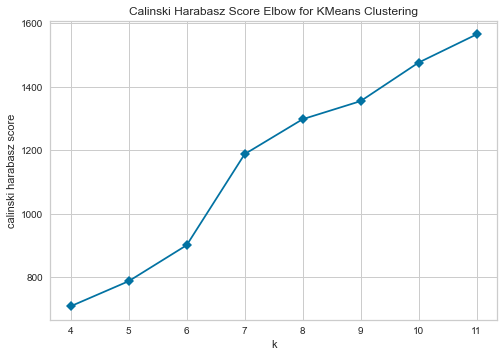

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [40]:
# Métrica --> calinski_harabasz

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        
visualizer.show() 

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [52]:
clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering()

In [53]:
clustering.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [73]:
''''
NO HE CONSEGUIDO SACAR LA GRAFICA ME HE ATASCADO Y NADA... ME HE HECHO UN LIO VAMOS

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plt.grid(b=None)
#plt.axis('off')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
'''

'\'\nmodel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)\nmodel = model.fit(X)\nplt.title(\'Hierarchical Clustering Dendrogram\')\nplt.grid(b=None)\n#plt.axis(\'off\')\n# plot the top three levels of the dendrogram\nplot_dendrogram(model, truncate_mode=\'level\', p=5)\nplt.xlabel("Number of points in node (or index of point if no parenthesis).")\nplt.show()\n'

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

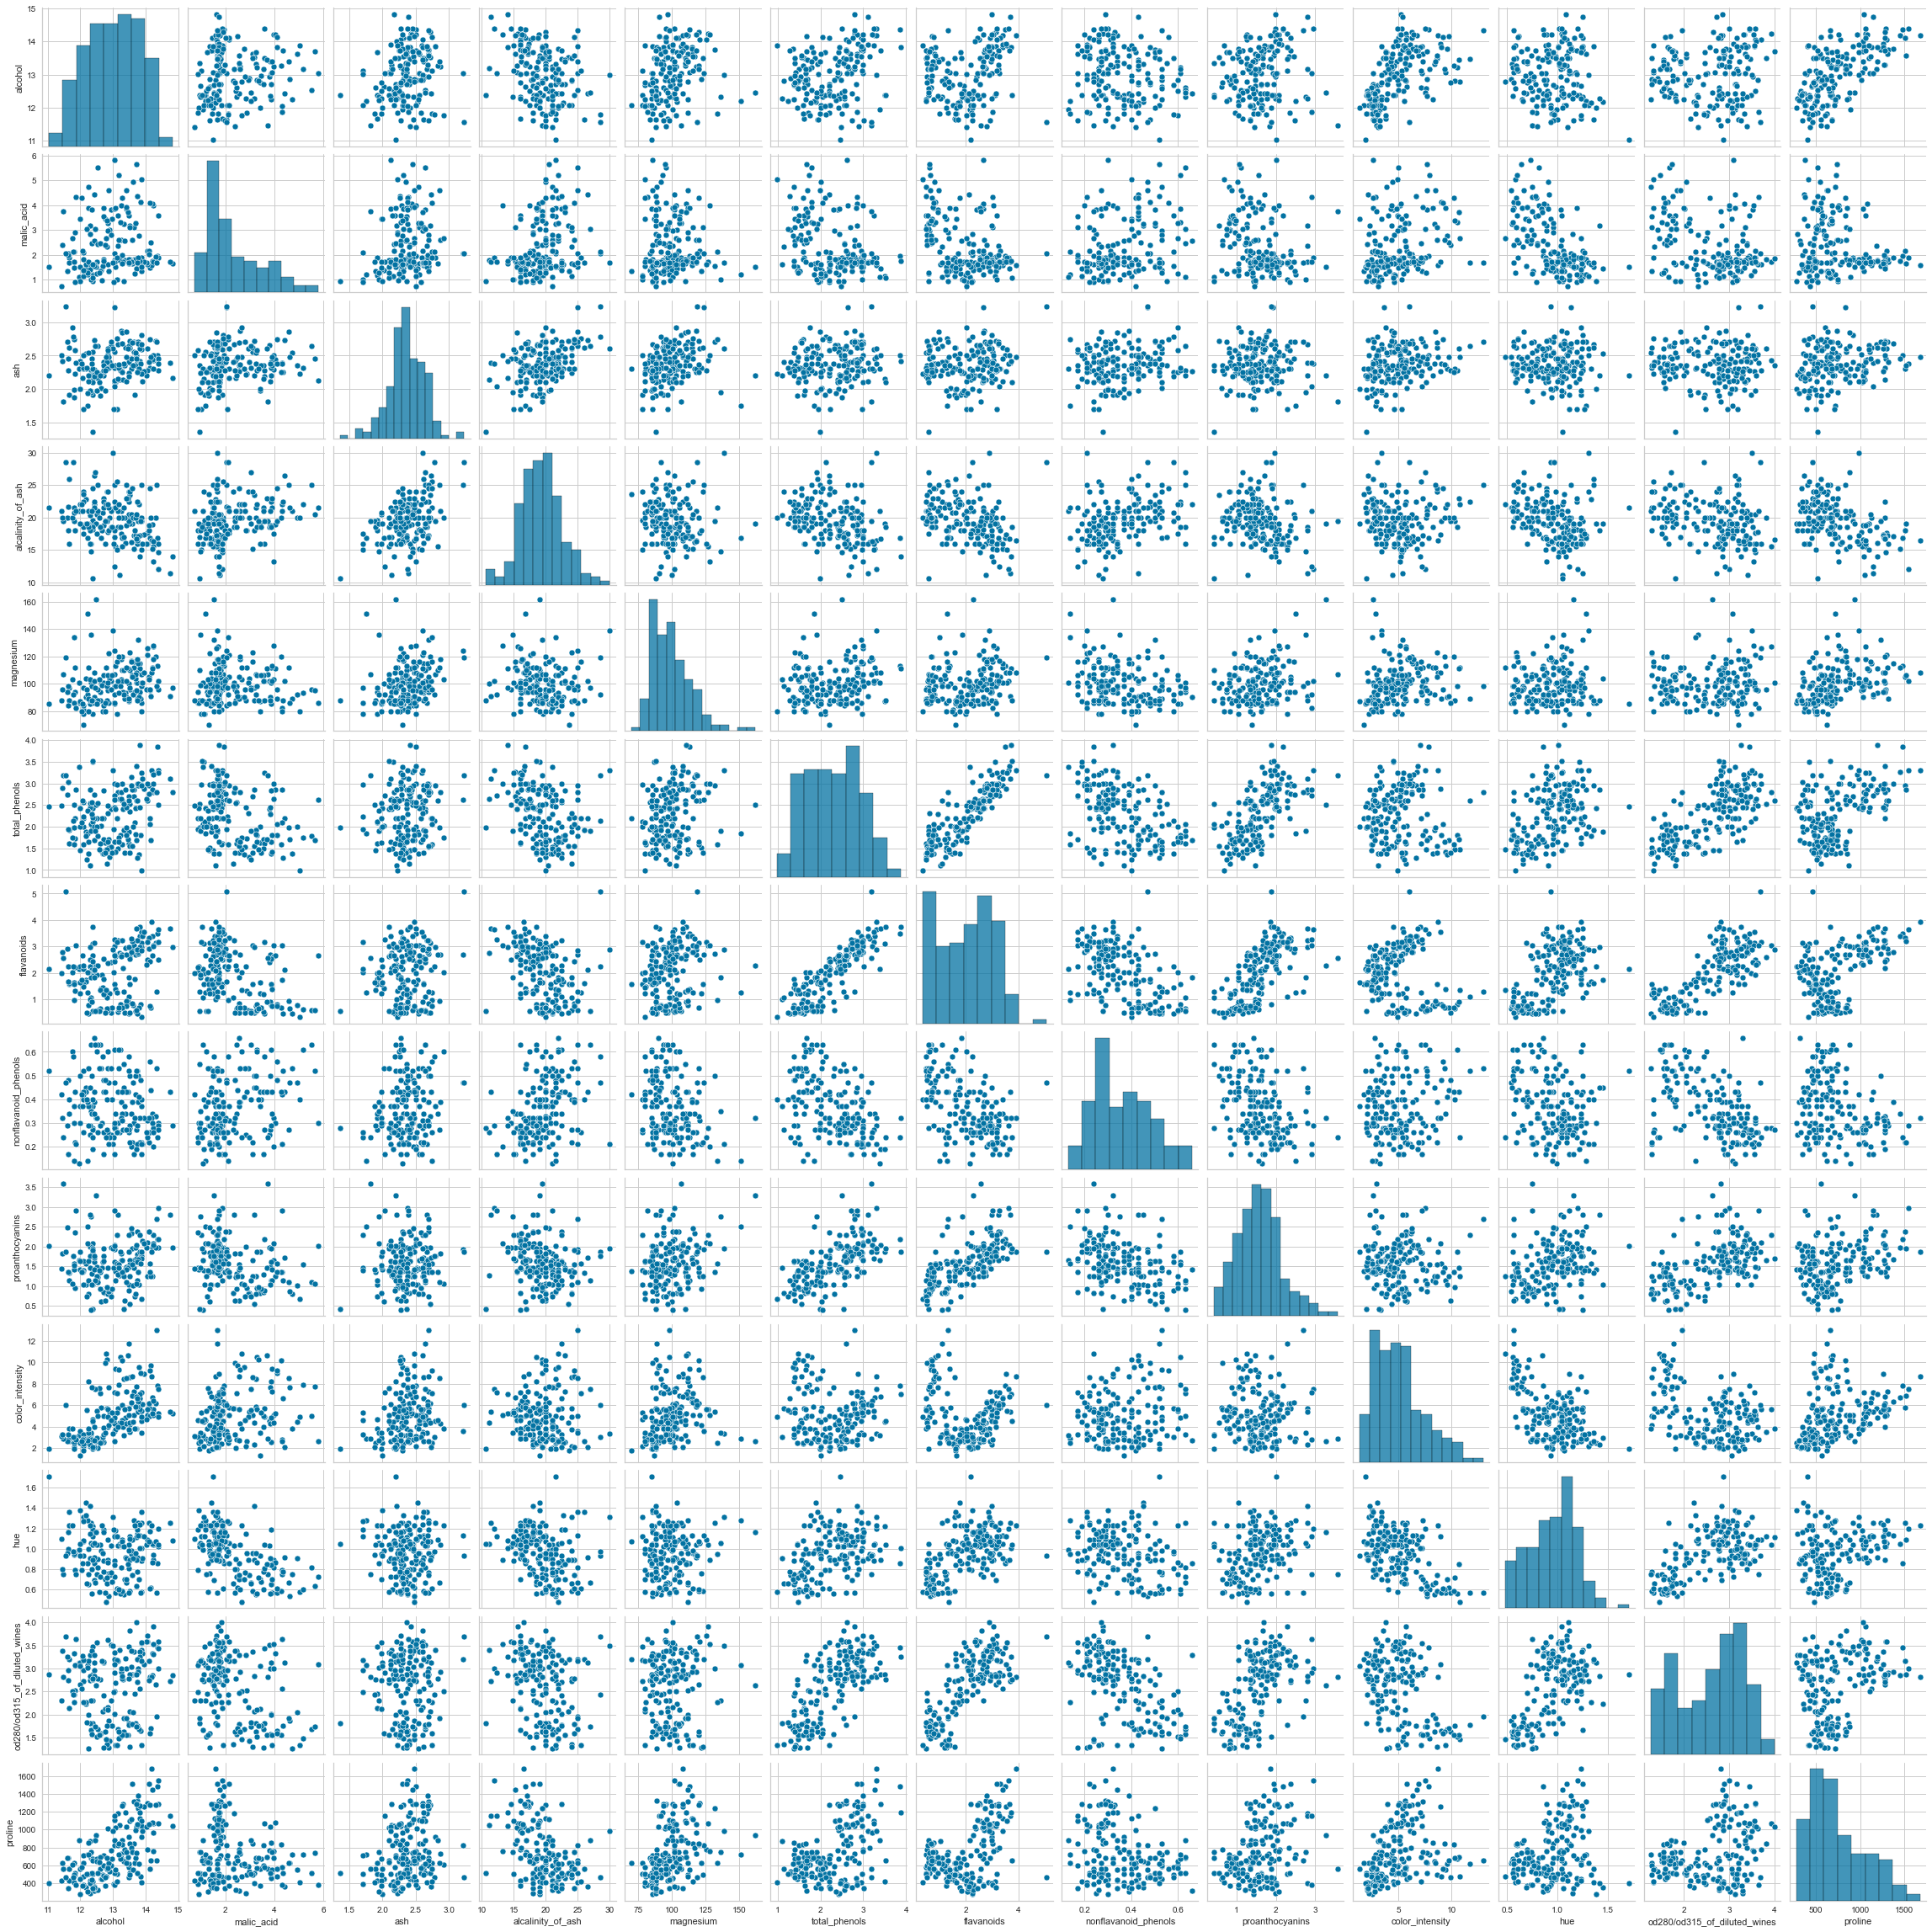

In [80]:
sns.pairplot(X)      # hue = n_clusters ???????

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [84]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(2))
pca_pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [85]:
pca = pca_pipeline.named_steps['pca']
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

c:\users\leticia\documents\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


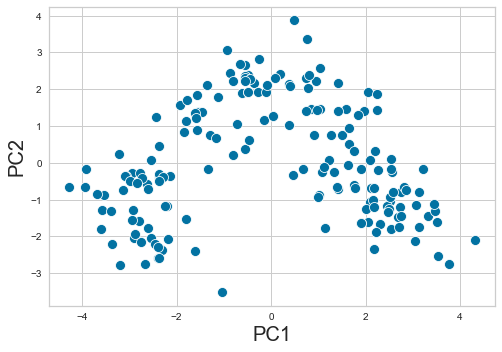

In [91]:
transformed_X = pca_pipeline.transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])


sns.scatterplot('PC1', 'PC2', data=data, s= 100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)

plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

c:\users\leticia\documents\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


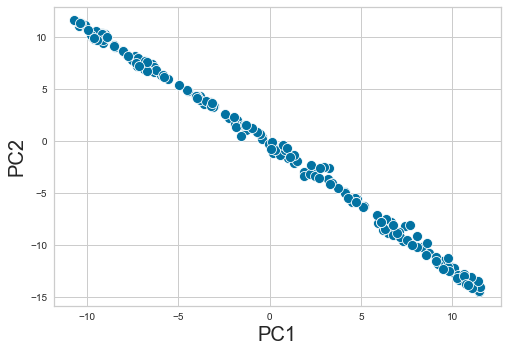

In [93]:
tsne = TSNE(n_components=2, perplexity=30)
transformed_X = tsne.fit_transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])


sns.scatterplot('PC1', 'PC2', data=data,  s= 100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()